# **Using Unsupervised Learning Algorithms in Mall_Customers Data**

# Import Libraries and Modules

In [34]:
# Libraries for Data Manipulation
import numpy as np
import pandas as pd 

# Libaries for Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt 

# Filter Warnings 
import warnings
warnings.filterwarnings('ignore')

# for Saving files 
import pickle

# using Scikit Learn for Preprocessing
from sklearn.preprocessing import LabelEncoder , StandardScaler

# using Scikit Learn for Clustering Algorithms
from sklearn.cluster import KMeans

# Loading DataSet

In [35]:
data = pd.read_csv("Mall_Customers.csv")

# let's see the data 
data.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
24,25,Female,54,28,14
32,33,Male,53,33,4
164,165,Male,50,85,26
148,149,Female,34,78,22
83,84,Female,46,54,44


# Basic EDA 

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [37]:
# for checking the duplicate rows 
data.duplicated().sum()

0

In [38]:
# for checking the null values 
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Visualizations

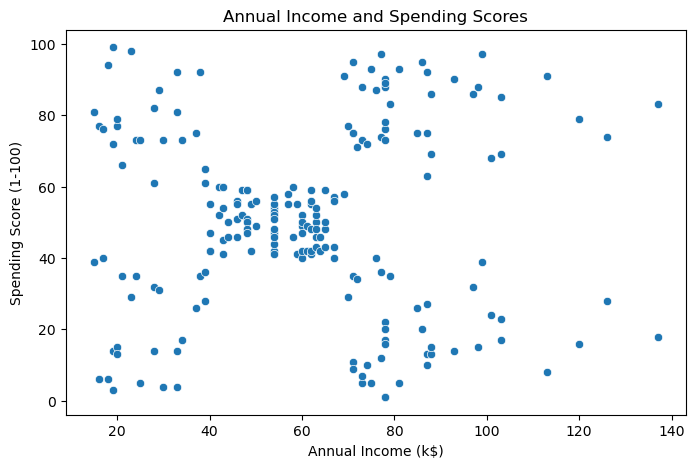

In [39]:
# checking the customer's spread on the basis of Annual Income and Spending Score 

plt.figure(figsize=(8,5))
sns.scatterplot(data=data.loc[:,['Annual Income (k$)','Spending Score (1-100)']], x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title('Annual Income and Spending Scores')
plt.show()

# Preprocessing before Modelling

In [40]:
# Label Encoding the gender feature
data_1 = data.copy()
encoder = LabelEncoder()
data_1['Gender'] = encoder.fit_transform(data_1['Gender'])

data_1.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [41]:
# Scaling the dataset
scaler = StandardScaler()
columns = data.columns 
data_1 = scaler.fit_transform(data_1)

df_scaled = pd.DataFrame(data_1, columns=columns)
df_scaled.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980


# Implementing K-Means for finding best no. of clusters

# Using Elbow Method

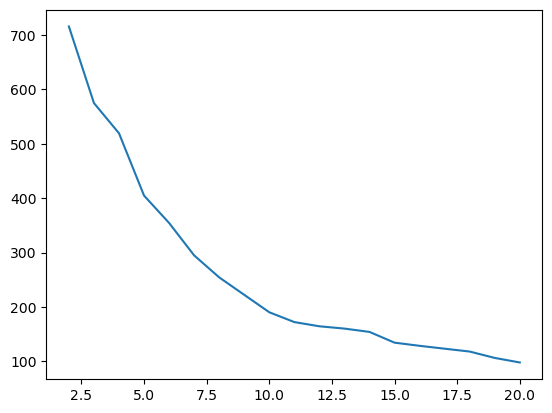

In [50]:
# Let's Assume some k-values(no. of cluster)

k_values = [2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20]

ssd = []

for k in k_values:
    KM = KMeans(n_clusters=k, max_iter=300, random_state=42)
    KM.fit(df_scaled)
    ssd.append(KM.inertia_)

plt.plot(k_values,ssd)    

# Using Silhouette Score

In [51]:
from sklearn.metrics import silhouette_score

k_values = [2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20]
scores = [] 

for k in k_values:
    K1 = KMeans(n_clusters=k, random_state=42, max_iter=300)
    K1.fit(df_scaled)
    score = silhouette_score(df_scaled,K1.labels_)
    scores.append(score)

print("No. of Cluster ---->>---- Scores")
for i,j in zip(k_values,scores):
    print(f"       {i}     ---->>---- {j:4f}")

No. of Cluster ---->>---- Scores
       2     ---->>---- 0.254190
       3     ---->>---- 0.252386
       4     ---->>---- 0.239909
       5     ---->>---- 0.287339
       6     ---->>---- 0.303367
       7     ---->>---- 0.334565
       8     ---->>---- 0.373237
       10     ---->>---- 0.406681
       11     ---->>---- 0.412955
       12     ---->>---- 0.391556
       13     ---->>---- 0.368855
       14     ---->>---- 0.374445
       15     ---->>---- 0.393372
       16     ---->>---- 0.386018
       17     ---->>---- 0.392504
       18     ---->>---- 0.393202
       19     ---->>---- 0.393094
       20     ---->>---- 0.386873


# *Insights - In elbow method it is difficult to find at which point changes are depleting but with the help of silhoutte score it is very easy to differentiate the clusters scores and found the best fit number of cluster*

# Labelling the Customers

In [90]:
# using no. of Clusters 11 due to highest Silhoutte Score

model = KMeans(n_clusters=11, max_iter=150, random_state=42)
model.fit(df_scaled)
print(model.labels_)

[ 4  4  5  2  5  2  5  2  0  2  0  2  5  2  5  4  5  4  0  2  4  4  5  4
  5  4  5  4  5  2  0  2  0  4  5  2  5  2  5  2  6  4  0  2  5  2  6  1
  1  1  6 10  1  0  6  0  6  0  1  0  0 10  6  6  0 10  6  6 10  1  0  6
  6  6  0 10  6 10  1  6  0 10  0  6  1  0  6  1  1  6  6 10  0  1  1 10
  6  1  0 10  1  6  0 10  0  1  6  0  0  0  0  1  1 10  1  1  6  6  6  6
 10  1  1  3  1  7  9  3  9  3  9  3  1  7  9  7  8  3  9  7  8  3  1  7
  9  3  9  7  8  3  9  3  8  7  8  7  9  7  9  7  8  7  9  7  9  7  9  7
  8  3  9  3  9  3  8  7  9  3  9  3  8  7  9  7  8  3  8  3  8  7  8  7
  9  7  8  7  8  3  9  3]


In [91]:
# Adding the Labels in Original DataSet
data['Customer_Category'] = model.labels_

data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Customer_Category
12,13,Female,58,20,15,5
6,7,Female,35,18,6,5
39,40,Female,20,37,75,2
141,142,Male,32,75,93,3
184,185,Female,41,99,39,8
15,16,Male,22,20,79,4
102,103,Male,67,62,59,0
88,89,Female,34,58,60,1
138,139,Male,19,74,10,9
16,17,Female,35,21,35,5


# Visualizing the dataset after Labelling 

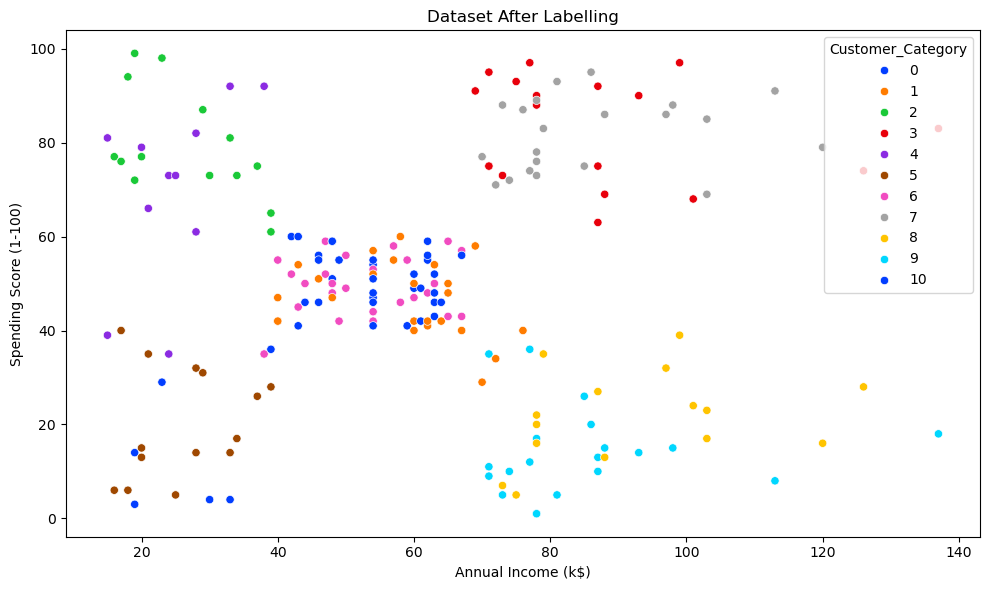

In [93]:
# After Labels

plt.figure(figsize=(10,6))
sns.scatterplot(data, x='Annual Income (k$)', y='Spending Score (1-100)'
                ,hue='Customer_Category', palette='bright')
plt.title("Dataset After Labelling")
plt.tight_layout()
plt.show()

# Swarmplot to Visualize the features according to Clustering

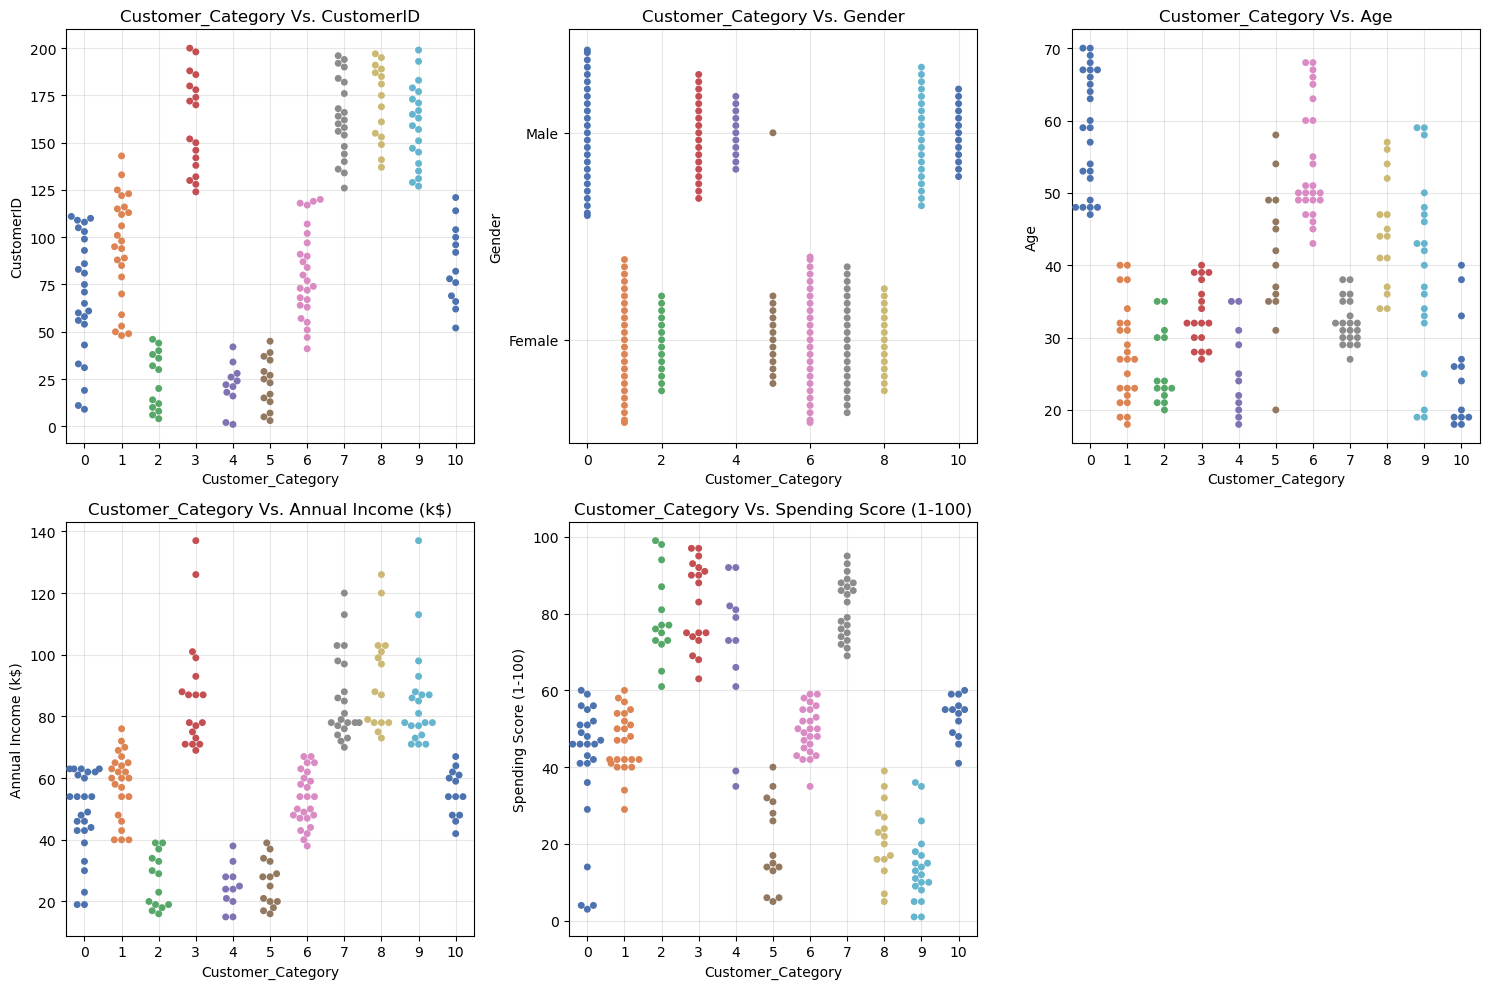

In [ ]:
# Swarplot is used to visualize the data with Labels.
plt.figure(figsize=(15,10))
for i,col in enumerate(columns):
    plt.subplot(2,3,i+1)
    sns.swarmplot(data, x='Customer_Category', y=col, hue='Customer_Category', 
                  palette='deep', legend=False)
    plt.title(f"Customer_Category Vs. {col}")
    plt.grid(alpha=0.3)
    

plt.tight_layout()
plt.show()    


# Saving the Labelled Dataset

In [89]:
# Saving the dataset in CSV file format

data.to_csv('Labelled_Mall_Customers.csv')